In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


### For practice purpose, we will randomly remove a few values

In [3]:
# Define the columns to modify
cols_to_modify = ['Name', 'Pclass','Sex','Age','Fare']

# Use the sample() method to select a random subset of rows for each column to modify
rows_to_modify = {}
for col in cols_to_modify:
    rows_to_modify[col] = df[col].dropna().sample(n=np.random.randint(25, 100)).index

# Set the values in the selected rows and columns to NaN
for col in cols_to_modify:
    df.loc[rows_to_modify[col], col] = np.nan

### Taking a look

In [4]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,NaN,1,0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,NaN,1,0,71.2833
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3.0,NaN,male,35.0,0,0,NaN


In [5]:
df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2.0,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,NaN,Miss. Margaret Edith Graham,female,19.0,0,0,NaN
884,0,3.0,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1.0,Mr. Karl Howell Behr,NaN,26.0,0,0,30.00
886,0,NaN,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [6]:
df.sample(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
87,1,1.0,Miss. Mabel Helen Fortune,female,23.0,3,2,263.0000
51,1,1.0,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292
226,0,3.0,Mr. John Hall Lovell,male,20.5,0,0,7.2500
746,1,2.0,Miss. Joan Wells,female,4.0,1,1,23.0000
701,0,3.0,Mr. Henrik Juul Hansen,male,26.0,1,0,NaN
578,1,1.0,Mrs. John Borland (Marian Longstreth Morris) T...,female,39.0,1,1,110.8833
344,1,NaN,Miss. Marion Elsie Smith,female,40.0,0,0,13.0000
254,1,NaN,Mrs. Darwis (Hanne Youssef Razi) Touma,female,29.0,0,2,15.2458
372,0,3.0,Miss. Stina Viola Palsson,female,3.0,3,1,NaN
145,1,3.0,Mr. August Edvard Andersson,male,27.0,0,0,7.7958


In [7]:
df.shape

(887, 8)

In [8]:
#here we can see the column names, the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   790 non-null    float64
 2   Name                     843 non-null    object 
 3   Sex                      816 non-null    object 
 4   Age                      850 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     789 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 55.6+ KB


In [9]:
#View number of uniques and counts
df['Pclass'].value_counts()

3.0    439
1.0    192
2.0    159
Name: Pclass, dtype: int64

In [10]:
# in percentage form
df['Pclass'].value_counts(normalize=True)

3.0    0.555696
1.0    0.243038
2.0    0.201266
Name: Pclass, dtype: float64

In [11]:
# how many unique names -- in this case, no passanger has the same name 
df['Name'].nunique()

843

In [12]:
# showing duplicates by multiple columns
# there are cases shown as some names are nulls
df[df.duplicated(subset=['Name', 'Pclass'])].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
79,0,3.0,NaN,male,22.0,0,0,9.0000
80,1,3.0,NaN,male,29.0,0,0,9.5000
99,0,3.0,NaN,female,28.0,0,0,7.8958
109,0,1.0,NaN,male,47.0,0,0,52.0000
117,0,1.0,NaN,NaN,24.0,0,1,247.5208


### Missing values

In [13]:
#we can also use this to check for nulls
df.isnull().any()

Survived                   False
Pclass                      True
Name                        True
Sex                         True
Age                         True
Siblings/Spouses Aboard    False
Parents/Children Aboard    False
Fare                        True
dtype: bool

In [14]:
# this is even better because we will know how many missing values there are
df.isnull().sum()

Survived                    0
Pclass                     97
Name                       44
Sex                        71
Age                        37
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                       98
dtype: int64

In [15]:
# this gives the percentage missing in decimals
df.isnull().mean().round(3)

Survived                   0.000
Pclass                     0.109
Name                       0.050
Sex                        0.080
Age                        0.042
Siblings/Spouses Aboard    0.000
Parents/Children Aboard    0.000
Fare                       0.110
dtype: float64

In [16]:
#print row with missing data 
rows_with_missing_data = df[df.isnull().any(axis=1)]
rows_with_missing_data.head(15)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3.0,Mr. Owen Harris Braund,male,NaN,1,0,7.2500
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,NaN,1,0,71.2833
4,0,3.0,NaN,male,35.0,0,0,NaN
8,1,3.0,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,NaN
11,1,1.0,Miss. Elizabeth Bonnell,female,NaN,0,0,26.5500
20,0,2.0,Mr. Joseph J Fynney,male,35.0,0,0,NaN
23,1,1.0,Mr. William Thompson Sloper,NaN,28.0,0,0,35.5000
24,0,3.0,Miss. Torborg Danira Palsson,NaN,8.0,3,1,21.0750
26,0,NaN,Mr. Farred Chehab Emir,male,26.0,0,0,7.2250
27,0,1.0,Mr. Charles Alexander Fortune,male,19.0,3,2,NaN


### What to do with Missing Data?
#### Missing data analysis
Missing data (littles chi sq test)
 
 - Missing Completely At Random (MCAR)
 - Missing At Random (MAR) – no true way to test
 - Missing Not At Random (MNAR)
 
Important to find out if there is a pattern to missing. eg. maybe it is a sensitive info in a survey!

#### Deleting vs imputting

Deleting missing data: 
 - delete entire row vs delete column vs pairwise
 - Deleting may not be the best answer as you may delete important information

 
Impute: 
 - **Arbitrary value**: eg. Educated guess that “Employment” column was not filled because they don’t have employment so use 0
 - **Creating a missing feature**
 - **Separate category**: label missing as missing category
 - **Mean value**: for numeric column. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.
 - **Median**** is the middlemost value. It’s better to use the median value for imputation in the case of outliers.
 - **Mode** is the most frequently occurring value. It is used in the case of categorical features.
 - **Hot-deck imputation**: In this method, missing values are imputed by values from similar cases in the same dataset. Hot-deck imputation can preserve the original distribution of the data, but it can introduce bias if the similarity criterion is not well-defined.
 - **Forward fill**: In some cases, imputing the values with the previous value instead of mean, mode or median is more appropriate. This is called forward fill. It is mostly used in time series data.
 - **KNN imputer**: k-Nearest Neighbours approach where a Euclidean distance is used to find the nearest neighbours base on features
 - **Regression**: similar to KNN but more for numerical 

Every method presents a pro and con and have to be carefully thought through. 

In [17]:
# example for dropping data -- which we will not be running as I do not want any lost of info at this point
# df = df.drop_duplicates(keep='last')
# df = df.drop(columns=['col1', 'col2'])
# df.drop('sex', axis = 1, inplace=True)

In [18]:
# Replace missing values with the mean of the column
# we will not put inplace=True as this is a demo 
# we will isntead show the before and after
df['age_mean_imputed'] = df['Age'].fillna(df['Age'].mean()).round(2)

# Define the columns you want to display
cols_to_display = ['age_mean_imputed', 'Age']
missing_display = df[df['Age'].isnull()]
missing_display[cols_to_display].sample(5)

,age_mean_imputed,Age
380,29.33,NaN
754,29.33,NaN
178,29.33,NaN
11,29.33,NaN
404,29.33,NaN


In [19]:
# Replace missing values with the mode of the column
# we will not put inplace=True as this is a demo 
# we will isntead show the before and after

# Calculate the mode of the column
mode_value = df['Sex'].mode()[0]

# Fill missing values with the mode
df['sex_mode_imputed'] = df['Sex'].fillna(mode_value)


# Define the columns you want to display
cols_to_display = ['sex_mode_imputed', 'Sex']
missing_display = df[df['Sex'].isnull()]
missing_display[cols_to_display].sample(5)

,sex_mode_imputed,Sex
446,male,NaN
475,male,NaN
822,male,NaN
790,male,NaN
211,male,NaN


In [20]:
### Filtering

In [21]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
0,0,3.0,Mr. Owen Harris Braund,male,NaN,1,0,7.2500,29.33,male
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,NaN,1,0,71.2833,29.33,female
2,1,3.0,Miss. Laina Heikkinen,female,26.0,0,0,7.9250,26.00,female
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35.00,female
4,0,3.0,NaN,male,35.0,0,0,NaN,35.00,male


In [22]:
#Filter by value use & or | for multiple
df[df['Fare'] > 70].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,NaN,1,0,71.2833,29.33,female
31,1,1.0,Mrs. William Augustus (Marie Eugenie) Spencer,female,48.0,1,0,146.5208,48.00,female
34,0,1.0,Mr. Edgar Joseph Meyer,male,28.0,1,0,82.1708,28.00,male
51,1,1.0,Mrs. Henry Sleeper (Myna Haxtun) Harper,female,49.0,1,0,76.7292,49.00,female
60,1,1.0,Miss. Amelie Icard,female,38.0,0,0,80.0000,38.00,female


In [23]:
# this is like a: Select * from DF where ... and ... and ...
df[(df["age_mean_imputed"] > 40) & (df["sex_mode_imputed"] == "male") & (df["Fare"] > 70)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
61,0,1.0,NaN,male,45.0,1,0,83.4750,45.0,male
123,0,1.0,Mr. Percival Wayland White,male,54.0,0,1,77.2875,54.0,male
244,0,NaN,NaN,male,44.0,2,0,90.0000,44.0,male
260,0,1.0,Mr. Emil Taussig,NaN,52.0,1,1,79.6500,52.0,male
297,1,NaN,Mrs. James (Helene DeLaudeniere Chaput) Baxter,NaN,50.0,0,1,247.5208,50.0,male


In [24]:
# filtering by 2 values of a column
df[df['Pclass'].isin([1, 2])].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
1,1,1.0,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,NaN,1,0,71.2833,29.33,female
3,1,1.0,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000,35.00,female
6,0,1.0,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625,54.00,male
9,1,2.0,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708,14.00,female
11,1,1.0,Miss. Elizabeth Bonnell,female,NaN,0,0,26.5500,29.33,female


In [25]:
# select where col between 10 and 30
df[df['Fare'].between(10, 30)].head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,age_mean_imputed,sex_mode_imputed
7,0,3.0,Master. Gosta Leonard Palsson,male,2.0,3,1,21.075,2.00,male
10,1,3.0,Miss. Marguerite Rut Sandstrom,female,4.0,1,1,16.700,4.00,female
11,1,1.0,Miss. Elizabeth Bonnell,female,NaN,0,0,26.550,29.33,female
15,1,2.0,Mrs. (Mary D Kingcome) Hewlett,female,55.0,0,0,16.000,55.00,female
16,0,3.0,Master. Eugene Rice,male,2.0,4,1,29.125,2.00,male


### Encoding/binning values

In [26]:
# Create age groups
bins = [0, 12, 18, 45, 150]
labels = ['children', 'teens', 'adults', 'seniors']
df['age_group'] = pd.cut(df['age_mean_imputed'], bins=bins, labels=labels, include_lowest=True)

# Sample an equal number of rows for each unique value in 'col'
n = 3
df[['age_group', 'age_mean_imputed']].groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), n))).head(12)


,age_group,age_mean_imputed
405,children,3.00
486,children,9.00
77,children,0.83
859,teens,14.00
110,teens,14.50
685,teens,18.00
119,adults,29.33
713,adults,38.00
374,adults,22.00
455,seniors,50.00


In [27]:
#ordinal encoding

df['age_group_ordinal'] = df['age_group'].map({"children":0,
                                                "teens":1,
                                                "adults":2,
                                                "seniors":3}).astype("int32")



df[['age_mean_imputed','age_group','age_group_ordinal']].groupby('age_group', group_keys=False).apply(lambda x: x.sample(min(len(x), n))).head(12)


,age_mean_imputed,age_group,age_group_ordinal
477,9.0,children,0
865,4.0,children,0
57,5.0,children,0
830,18.0,teens,1
200,17.0,teens,1
264,16.0,teens,1
772,20.0,adults,2
300,19.0,adults,2
195,28.0,adults,2
583,47.0,seniors,3


### Simple queries

In [28]:
# agg with groupby 
df.groupby("Pclass")["Fare"].mean()

Pclass
1.0    83.532989
2.0    21.032581
3.0    14.089993
Name: Fare, dtype: float64

In [29]:
df.groupby("Pclass")["Fare"].agg(["count", "mean", "median"])

,count,mean,median
Pclass,,,
1.0,170,83.532989,57.4896
2.0,144,21.032581,17.3750
3.0,391,14.089993,8.0500


In [30]:
# Sorting
# resetting index is just for looks
df['Fare'].sort_values(ascending=False).reset_index().head()

,index,Fare
0,676,512.3292
1,257,512.3292
2,733,512.3292
3,87,263.0000
4,435,263.0000


In [31]:
df[['Fare']].describe()

,Fare
count,789.000000
mean,32.211422
std,49.932737
min,0.000000
25%,7.925000
50%,14.458300
75%,31.275000
max,512.329200


In [32]:
pd.crosstab(df['Pclass'], df['sex_mode_imputed'])

sex_mode_imputed,female,male
Pclass,,
1.0,78,114
2.0,63,96
3.0,128,311


### Editing Strings

In [34]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare', 'age_mean_imputed',
       'sex_mode_imputed', 'age_group', 'age_group_ordinal'],
      dtype='object')

In [35]:
df['Name'].sample(10)

841                                             NaN
421                      Mr. Viktor Richard Rosblom
579                       Mr. William James Downton
529                             Mr. Joseph Jr Elias
558                                Mr. Husein Sivic
743                            Miss. Anna Sinkkonen
295                     Miss. Helen Loraine Allison
568    Mrs. Edward Dale (Charlotte Lamson) Appleton
267                           Miss. Amelia Bissette
350                               Mr. Tannous Elias
Name: Name, dtype: object

In [36]:
df['Name_lower'] = df['Name'].str.lower()
df['Name_upper'] = df['Name'].str.upper()
df['Name_replace'] = df['Name'].str.replace('Mr', 'Mister')

In [39]:
li = ['Name', 'Name_lower', 'Name_upper', 'Name_replace']
df[li].sample(10)

,Name,Name_lower,Name_upper,Name_replace
366,Miss. Annie Jermyn,miss. annie jermyn,MISS. ANNIE JERMYN,Miss. Annie Jermyn
536,Miss. Hedwig Margaritha Frolicher,miss. hedwig margaritha frolicher,MISS. HEDWIG MARGARITHA FROLICHER,Miss. Hedwig Margaritha Frolicher
562,Mr. Alfred J Davies,mr. alfred j davies,MR. ALFRED J DAVIES,Mister. Alfred J Davies
662,Mr. Lewis Hickman,mr. lewis hickman,MR. LEWIS HICKMAN,Mister. Lewis Hickman
722,Mrs. Peter Henry (Lillian Jefferys) Renouf,mrs. peter henry (lillian jefferys) renouf,MRS. PETER HENRY (LILLIAN JEFFERYS) RENOUF,Misters. Peter Henry (Lillian Jefferys) Renouf
345,Mrs. Thomas Henry (Mary E Finck) Davison,mrs. thomas henry (mary e finck) davison,MRS. THOMAS HENRY (MARY E FINCK) DAVISON,Misters. Thomas Henry (Mary E Finck) Davison
160,Mrs. James (Elizabeth Inglis Milne) Watt,mrs. james (elizabeth inglis milne) watt,MRS. JAMES (ELIZABETH INGLIS MILNE) WATT,Misters. James (Elizabeth Inglis Milne) Watt
54,Mr. Hugh Woolner,mr. hugh woolner,MR. HUGH WOOLNER,Mister. Hugh Woolner
579,Mr. William James Downton,mr. william james downton,MR. WILLIAM JAMES DOWNTON,Mister. William James Downton
621,Mr. David John Bowen,mr. david john bowen,MR. DAVID JOHN BOWEN,Mister. David John Bowen


In [ ]:
### Plots

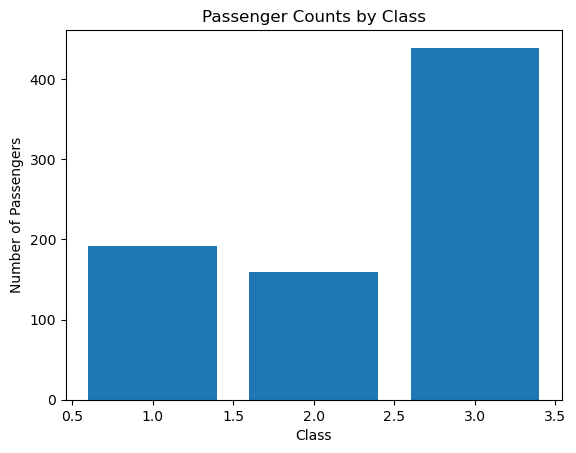

In [40]:
# Bar chart showing the number of passengers in each class
class_counts = df["Pclass"].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel("Class")
plt.ylabel("Number of Passengers")
plt.title("Passenger Counts by Class")
plt.show()

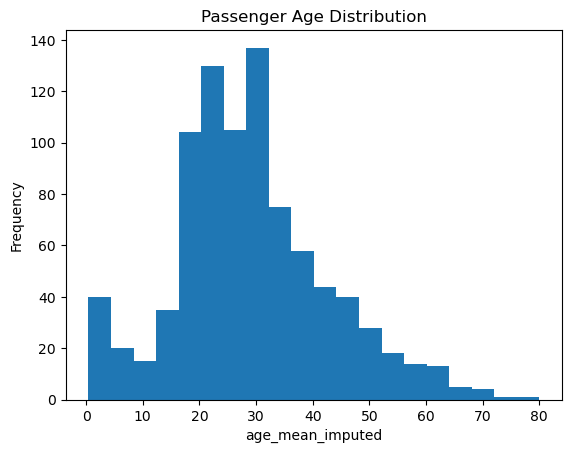

In [42]:
# Histogram showing the distribution of passenger ages
plt.hist(df["age_mean_imputed"], bins=20)
plt.xlabel("age_mean_imputed")
plt.ylabel("Frequency")
plt.title("Passenger Age Distribution")
plt.show()

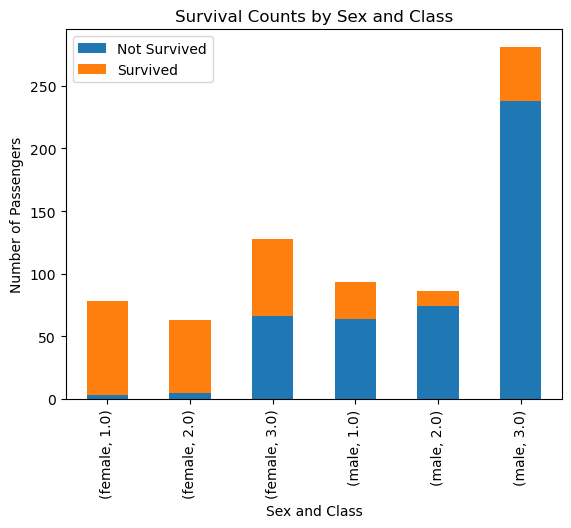

In [43]:
# Stacked bar chart showing the survival rates of male and female passengers in each class
survival_counts = df.groupby(["Sex", "Pclass", "Survived"]).size().unstack()
survival_counts.plot(kind="bar", stacked=True)
plt.xlabel("Sex and Class")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Sex and Class")
plt.legend(["Not Survived", "Survived"], loc="upper left")
plt.show()

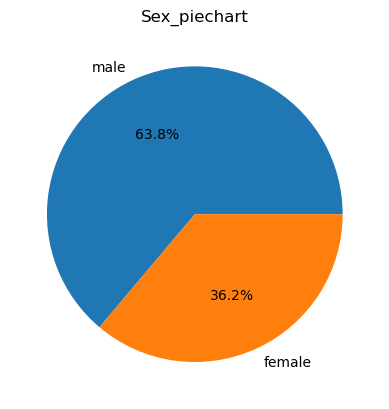

In [45]:
# Pie chart showing the proportion of passengers in each port of embarkation
Sex_counts = df["Sex"].value_counts()
plt.pie(Sex_counts.values, labels=Sex_counts.index, autopct="%1.1f%%")
plt.title("Sex_piechart")
plt.show()

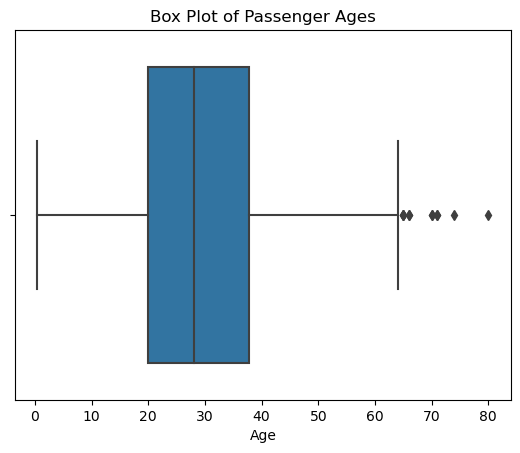

In [48]:
# Create a box plot for the age column
sns.boxplot(x=df["Age"])
plt.xlabel("Age")
plt.title("Box Plot of Passenger Ages")
plt.show()

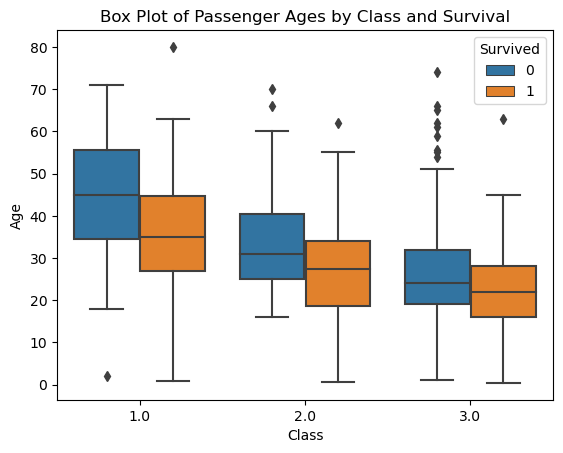

In [46]:
# Create a box plot for the age column, grouped by passenger class and survival
sns.boxplot(x="Pclass", y="Age", hue="Survived", data=df)
plt.xlabel("Class")
plt.ylabel("Age")
plt.title("Box Plot of Passenger Ages by Class and Survival")
plt.show()

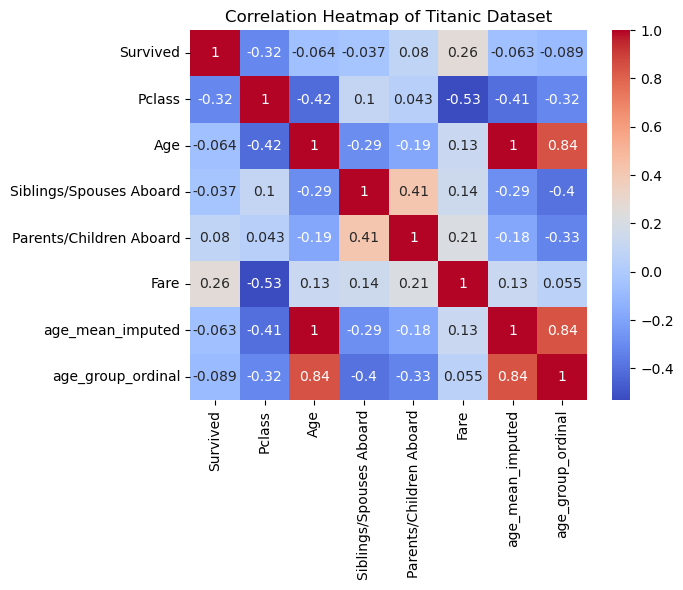

In [49]:
# Create a correlation heatmap for all numerical columns
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

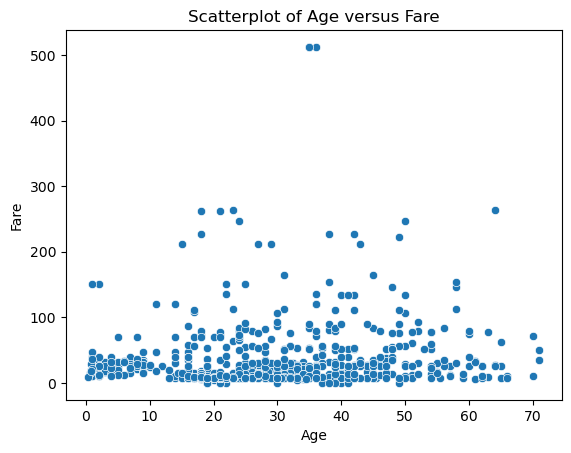

In [52]:
# Create a scatterplot of age versus fare
sns.scatterplot(x="Age", y="Fare", data=df)
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Scatterplot of Age versus Fare")
plt.show()